# Stabilité des systèmes linéaires

Import des librairies

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt
from scipy.integrate import odeint

Fonctions 
<ul>
    <li> modèle linéaire
    <li> calcul du déterminant, de la trace et du discriminant
    <li> tracé des axes principaux
    <li> tracé des courbes à partir d'un bord
    <li> tracé des flêches
    <li> fin du tracé
</ul>

In [67]:
def modele_lineaire(t, y):
    return np.array([A[0,0] * y[0] + A[0,1] * y[1],
                     A[1,0] * y[0] + A[1,1] * y[1]])

def det_tr_Delta():
    # A variable globale
    det = A[0,0] * A[1,1] - A[0,1] * A[1,0]
    tr = A[0,0] + A[1,1]
    Delta = tr * tr - 4 * det
    return [det, tr, Delta]

def traceaxes(tr, Delta):
    lambda_plus = (tr + sqrt(Delta)) / 2
    lambda_moins = (tr - sqrt(Delta)) / 2
    plt.plot([-1,1], [(lambda_plus - A[0,0]) / A[0,1] * (-1), 
                      (lambda_plus - A[0,0]) / A[0,1] * (1)], 'k--')
    plt.plot([-1,1], [(lambda_moins - A[0,0]) / A[0,1] * (-1), 
                      (lambda_moins - A[0,0]) / A[0,1] * (1)], 'k--')

def tracecourbes(bord,sens):
    for i in np.linspace(-1, 1, 10):
        if bord == "gauche": y0 = [-1,i]
        if bord == "droite": y0 = [1,i]
        if bord == "bas": y0 = [i,-1]
        if bord == "haut": y0 = [i,1]
        if bord == "centre": y0 = [i/2,i/2]    
        if sens == "repulsif": t = t_lin_back
        if sens == "attractif": t = t_lin
        y = odeint(modele_lineaire, y0, t, tfirst=True)
        plt.plot(y[:,0], y[:,1], 'b')
        
def tracefleches():
    a = np.linspace(-1, 1, 10)
    b = np.linspace(-1, 1, 10)
    a1, b1 = np.meshgrid(a, b)
    da1, db1 = modele_lineaire(0, [a1, b1])
    m = np.hypot(da1, db1)
    m[m==0] = 1.
    da1 /= m / 2
    db1 /= m / 2
    plt.quiver(a1, b1, da1, db1, m)    

def fintrace():
    plt.axis('equal')
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    
def printinfo(det, tr, Delta):
    print(f"Déterminant : {det}, trace : {tr}, discriminant : {Delta}")

Paramètres numériques

In [68]:
dt_lin = .01
tmax_lin = 10
nmax_lin = int(tmax_lin / dt_lin)
t_lin = [dt_lin * i for i in range(nmax_lin)]
t_lin_back = [tmax_lin - dt_lin * i for i in range(nmax_lin)]

Nœud répulsif

Déterminant : 1.75, trace : 3.0, discriminant : 2.0


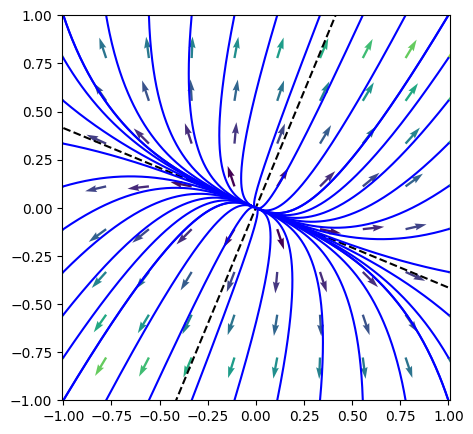

In [69]:
A = np.array([[1,0.5],[0.5,2]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr,Delta)
tracecourbes("gauche","repulsif")
tracecourbes("droite","repulsif")
tracecourbes("bas","repulsif")
tracecourbes("haut","repulsif")
fintrace()

plt.savefig('./stabilite_noeudrepulsif.pdf')
plt.show()

Nœud attractif

Déterminant : 1.75, trace : -3.0, discriminant : 2.0


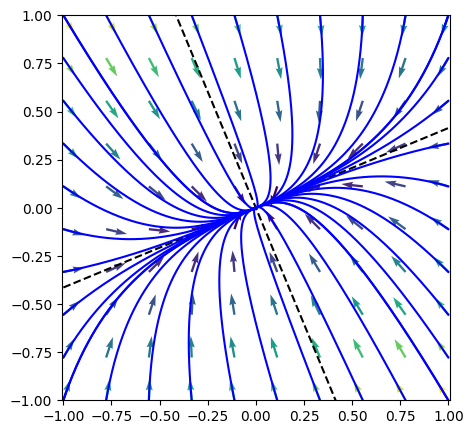

In [70]:
A = np.array([[-1,0.5],[0.5,-2]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr,Delta)
tracecourbes("gauche","attractif")
tracecourbes("droite","attractif")
tracecourbes("bas","attractif")
tracecourbes("haut","attractif")
fintrace()

plt.savefig('./stabilite_noeudattractif.pdf')
plt.show()

Col

Déterminant : -3, trace : 0, discriminant : 12


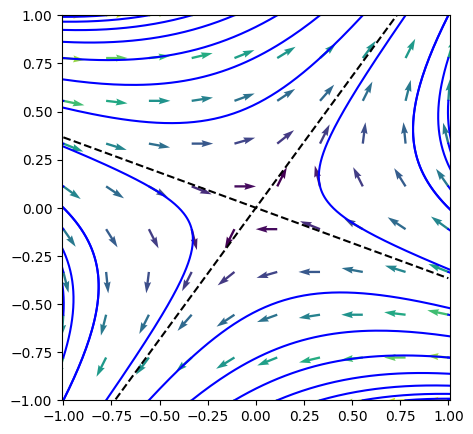

In [71]:
A = np.array([[-1,2],[1,1]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr,Delta)
tracecourbes("gauche","repulsif")
tracecourbes("droite","repulsif")
tracecourbes("bas","repulsif")
tracecourbes("haut","repulsif")
fintrace()

plt.savefig('./stabilite_col.pdf')
plt.show()

Foyer repulsif

Déterminant : 105, trace : 18, discriminant : -96


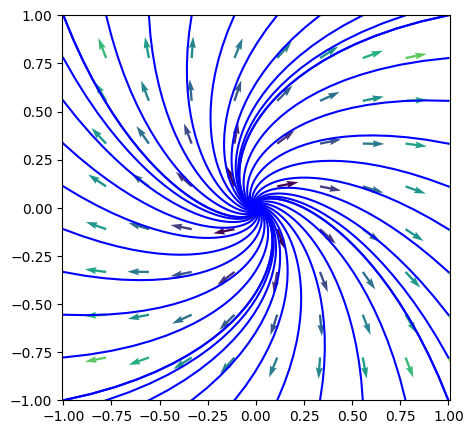

In [72]:
A = np.array([[10,5], [-5,8]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr,Delta)
tracecourbes("gauche","repulsif")
tracecourbes("droite","repulsif")
tracecourbes("bas","repulsif")
tracecourbes("haut","repulsif")
fintrace()

plt.savefig('./stabilite_foyerrepulsif.pdf')
plt.show()

Foyer attractif

Déterminant : 105, trace : -18, discriminant : -96


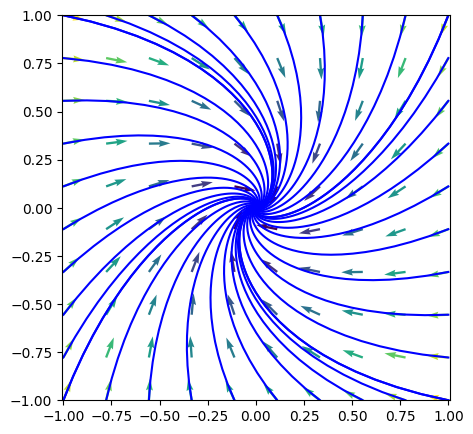

In [73]:
A = np.array([[-10,5], [-5,-8]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr,Delta)
tracecourbes("gauche","attractif")
tracecourbes("droite","attractif")
tracecourbes("bas","attractif")
tracecourbes("haut","attractif")
fintrace()

plt.savefig('./stabilite_foyerattractif.pdf')
plt.show()

Sur la parabole $\Delta=0$

Déterminant : 4.0, trace : 4.0, discriminant : 0.0


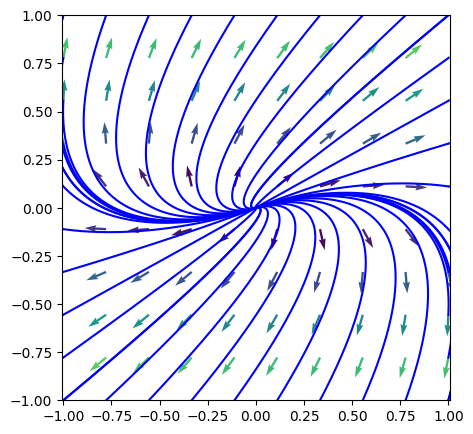

In [74]:
A = np.array([[1,2], [-0.5,3]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr,Delta)
tracecourbes("gauche","repulsif")
tracecourbes("droite","repulsif")
tracecourbes("bas","repulsif")
tracecourbes("haut","repulsif")
fintrace()

plt.savefig('./stabilite_parabole.pdf')
plt.show()

Sur l'axe

Déterminant : 0, trace : -10, discriminant : 100


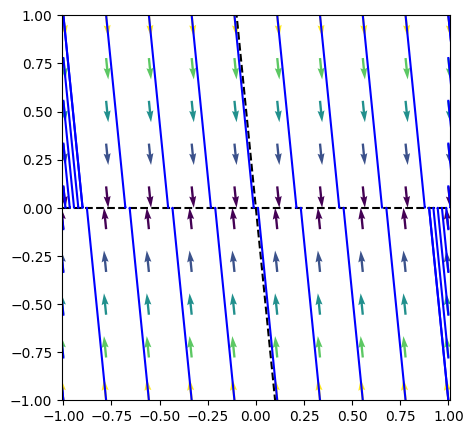

In [75]:
A = np.array([[0,1], [0,-10]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr,Delta)
tracecourbes("gauche","attractif")
tracecourbes("droite","attractif")
tracecourbes("bas","attractif")
tracecourbes("haut","attractif")
fintrace()

plt.savefig('./stabilite_axe.pdf')
plt.show()

Origine

Déterminant : 0, trace : 0, discriminant : 0


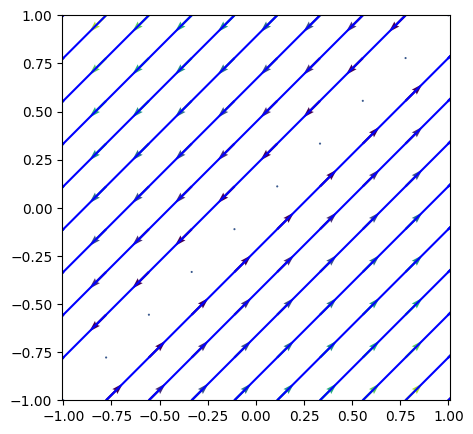

In [76]:
A = np.array([[1,-1],[1,-1]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr,Delta)
tracecourbes("gauche", "attractif")
tracecourbes("droite", "attractif")
tracecourbes("bas", "attractif")
tracecourbes("haut", "attractif")
fintrace()

plt.savefig('./stabilite_origine.pdf')
plt.show()

Centre

Déterminant : 3, trace : 0, discriminant : -12


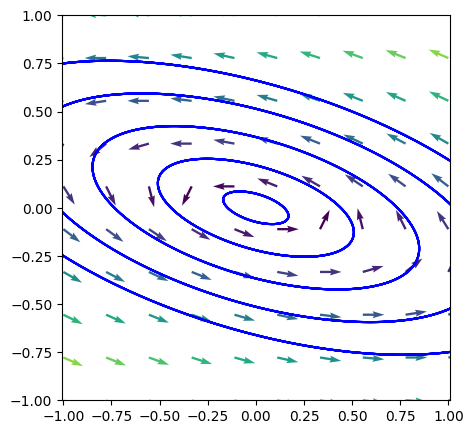

In [77]:
A = np.array([[-1,-4], [1,1]])
[det, tr, Delta] = det_tr_Delta()
printinfo(det, tr, Delta)

plt.figure(figsize=(5,5))
tracefleches()
if Delta > 0: traceaxes(tr, Delta)
tracecourbes("centre", "attractif")
fintrace()

plt.savefig('./stabilite_centre.pdf')
plt.show()